In [1]:
import torch_geometric
import matplotlib.pyplot as plt
import numpy as np
from torch_geometric.datasets import WikiCS
import random

In [2]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

In [180]:
def random_graph(n, m):
    edges = torch.randint(0, n, torch.Size((2, m)))
    x = torch.range(0, n-1).unsqueeze(-1)
    return Data(edge_index=edges, x=x)

def create_edges(tensor, offset, mod):
    b = (tensor + offset)%mod
    return torch.cat((tensor, b), dim=0).long()
def small_world_graph(n, m):
    beg = torch.range(0, n-1).unsqueeze(0)
    a1 = create_edges(beg, -2, n)
    a2 = create_edges(beg, -1, n)
    a3 = create_edges(beg, +1, n)
    a4 = create_edges(beg, +2, n)
    a5 = random_graph(n, m).edge_index
    
    edges = torch.cat((a1, a2, a3, a4, a5), dim=1)
    x = torch.range(0, n-1).unsqueeze(-1)
    return Data(edge_index=edges, x=x)
def plt_log_degree(deg, log=True, range_max=100, range_min=0):
    outd = deg
    y, _ = np.histogram(outd.numpy(),  bins=np.array(list(range(range_min, range_max))))
    x = np.array(list(range(range_min, range_max-1)))
    if log:
        x, y = np.log(x), np.log(y+1e-1)
    plt.plot(x, y)
def make_adj_matrix(graph):
    mat = torch.zeros(graph.num_nodes, graph.num_nodes, dtype=torch.bool)
    print(mat.shape)
    for a, b in zip(graph.edge_index[0], graph.edge_index[1]):
        if a != b and mat[a, b]==0 and mat[b, a]==0:
            mat[a, b] = 1
            mat[b, a] = 1
    return mat

In [196]:
amat = make_adj_matrix(d)

torch.Size([5242, 5242])


5242

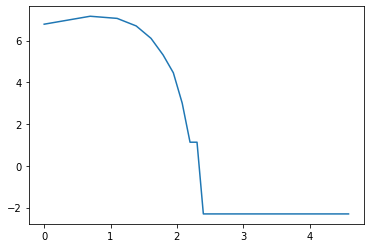

In [236]:
drand = random_graph(5242, 14484)
deg = cout_out_degree(drand)
plt_log_degree(deg)
d.num_nodes

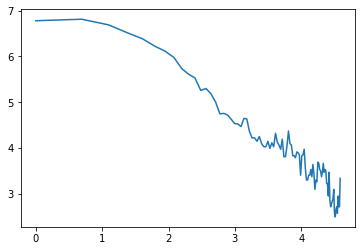

In [235]:
dataset = WikiCS('/home/darijan/Desktop/machine learning on graphs')
dwiki = dataset[0]
deg = cout_out_degree(dwiki)
plt_log_degree(deg)

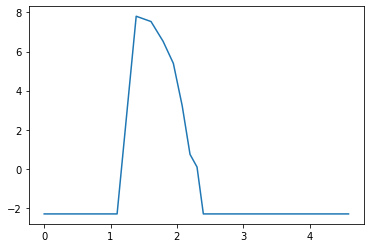

In [238]:
dsmall = small_world_graph(5242, 4000)
deg = cout_out_degree(dsmall)
plt_log_degree(deg)

In [203]:
amat_wiki  = make_adj_matrix(dwiki)

torch.Size([11701, 11701])


In [229]:
prob_clustering_coeff(dwiki, amat_wiki)

1.0 %

tensor(0.4800)

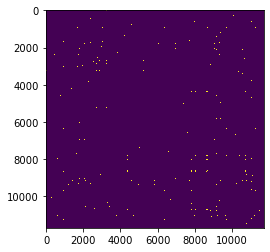

In [206]:
plt.imshow(amat_wiki)

In [237]:
amat_random = make_adj_matrix(drand)
prob_clustering_coeff(drand, amat_random)

torch.Size([5242, 5242])
100.0 %

tensor(0.0010)

In [239]:
amat_small = make_adj_matrix(dsmall)
prob_clustering_coeff(dsmall, amat_small)

torch.Size([5242, 5242])
100.0 %

tensor(0.2816)

In [62]:
def cout_out_degree(data):
    cnt = torch.zeros(data.x.shape[0], )
    for edge in data.edge_index[0]:
        cnt[edge] += 1
    return cnt
def cout_in_degree(data):
    cnt = torch.zeros(data.x.shape[0], )
    for edge in data.edge_index[1]:
        cnt[edge] += 1
    return cnt

In [231]:
def prob_clustering_coeff(graph, adj_mat, n=10000):
    nhit = 0.001
    n2 = n
    while n2 > 0:
        ii = random.randint(0, len(adj_mat)-1)
        frst = torch.tensor(list(range(len(adj_mat))))
        idcs = torch.masked_select(frst, adj_mat[ii])
        perm = torch.randperm(idcs.shape[0])
        idx = perm[:2]
        samples = idcs[idx]
        if len(samples) >= 2:
            nhit += adj_mat[samples[0], samples[1]].float()
            n2 -= 1
        print(100-n2/n*100, "%", end='\r')
    return nhit/n

prob_clustering_coeff(d, amat)

100.0 %

tensor(0.0009)

In [187]:
a = torch.tensor([2387, 1107])
amat[a]

tensor([[ True, False, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False]])

tensor([1., 2., 2., 1., 1., 0., 1., 0., 2., 2., 2., 1., 0., 0., 0., 0., 0., 2.,
        0., 1., 2., 0., 1., 1., 2., 0., 1., 0., 0., 1., 0., 3., 0., 2., 1., 2.,
        3., 2., 0., 1., 1., 1., 0., 3., 0., 1., 1., 0., 2., 1.])

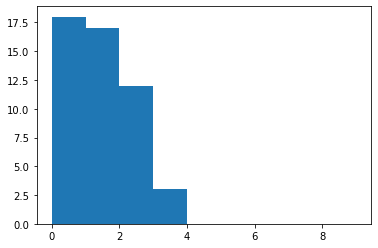

In [82]:
plt.hist(outd.numpy(), bins=np.array(list(range(0, 10))))
outd

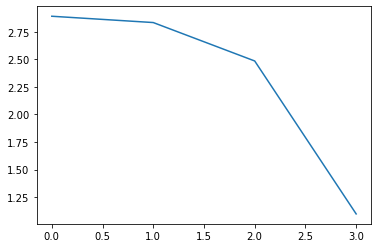

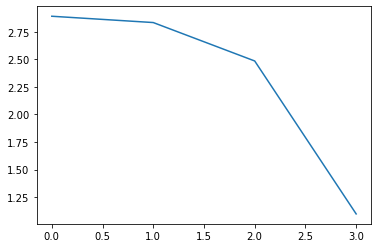

In [93]:
plt.plot(x)